In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn import ensemble
from sklearn.svm import SVC
%matplotlib inline

In [3]:
df=pd.read_csv("voice.csv")

In [4]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [5]:
df.shape

(3168, 21)

In [6]:
#Replacing labels for male as 1 and for females as 0
dict = {'label':{'male':1,'female':0}}      
df.replace(dict,inplace = True)

In [7]:
x=df.loc[:,df.columns!='label']
y=df.loc[:,'label']

In [8]:
#Scaling
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(x)
print(x)

[[-0.8071628  -0.05318289 -0.8317495  ... -1.         -1.
  -1.        ]
 [-0.74834392  0.0101493  -0.76620045 ... -0.99571122 -0.99570815
  -0.88710201]
 [-0.64155567  0.35107163 -0.79425462 ... -0.9992852  -0.99928469
  -0.90022969]
 ...
 [-0.03010284  0.59808442  0.38067309 ... -0.73195139 -0.73175966
  -0.58223074]
 [-0.01496791  0.49138407  0.39062259 ... -0.67190851 -0.67167382
  -0.33288113]
 [ 0.19139928  0.53792779  0.37518006 ... -0.94996426 -0.94992847
  -0.2492284 ]]


In [9]:
#Dividing into Test and Train 
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [10]:
x_train.shape

(2534, 20)

In [11]:
x_test.shape

(634, 20)

In [12]:
#decision tree

dec_tree = tree.DecisionTreeClassifier(random_state  = 50)
dec_tree.fit(x_train,y_train)
print("Decision Tree Classification score : ",dec_tree.score(x_test,y_test))

Decision Tree Classification score :  0.9605678233438486


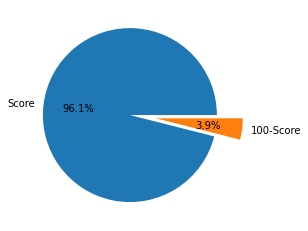

In [13]:
plt.pie([dec_tree.score(x_test,y_test)*100,100-(dec_tree.score(x_test,y_test)*100)],labels=['Score','100-Score'],autopct='%1.1f%%',explode=(0,0.3))
plt.show()

In [14]:
#random forest

rand_for = ensemble.RandomForestClassifier(random_state  = 50)
rand_for.fit(x_train,y_train)
print("Random Forest Classification score : ",rand_for.score(x_test,y_test))

Random Forest Classification score :  0.9747634069400631


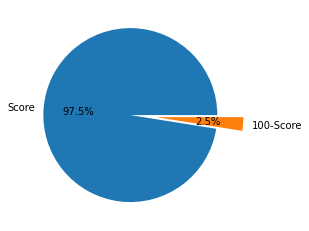

In [15]:
plt.pie([rand_for.score(x_test,y_test)*100,100-(rand_for.score(x_test,y_test)*100)],labels=['Score','100-Score'],autopct='%1.1f%%',explode=(0,0.3))
plt.show()

In [16]:
#support vector machine

sup_vec = SVC()
sup_vec.fit(x_train,y_train)
print("Support Vector Machine score : ",sup_vec.score(x_test,y_test))

Support Vector Machine score :  0.973186119873817


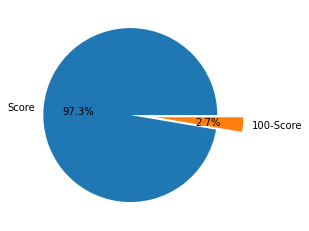

In [17]:
plt.pie([sup_vec.score(x_test,y_test)*100,100-(sup_vec.score(x_test,y_test)*100)],labels=['Score','100-Score'],autopct='%1.1f%%',explode=(0,0.3))
plt.show()

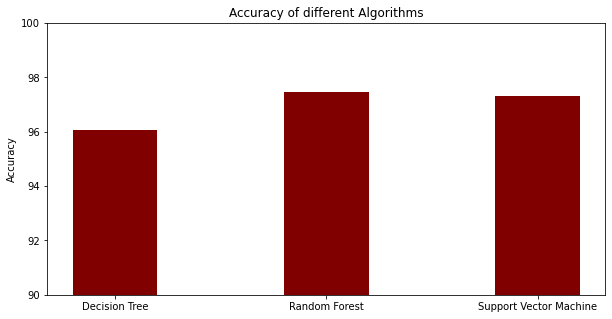

In [28]:
data = {'Decision Tree':dec_tree.score(x_test,y_test) , 'Random Forest':rand_for.score(x_test,y_test) ,
        'Support Vector Machine':sup_vec.score(x_test,y_test) } 
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
plt.ylabel("Accuracy")
plt.title("Accuracy of different Algorithms")
plt.ylim((90,100))
plt.show()